w=  0.0
	 x_val:  1.0 y_val:  2.0 y_pred_val:  0.0 4.0
	 x_val:  2.0 y_val:  4.0 y_pred_val:  0.0 16.0
	 x_val:  3.0 y_val:  6.0 y_pred_val:  0.0 36.0
MSE:  18.666666666666668
w=  0.1
	 x_val:  1.0 y_val:  2.0 y_pred_val:  0.1 3.61
	 x_val:  2.0 y_val:  4.0 y_pred_val:  0.2 14.44
	 x_val:  3.0 y_val:  6.0 y_pred_val:  0.30000000000000004 32.49
MSE:  16.846666666666668
w=  0.2
	 x_val:  1.0 y_val:  2.0 y_pred_val:  0.2 3.24
	 x_val:  2.0 y_val:  4.0 y_pred_val:  0.4 12.96
	 x_val:  3.0 y_val:  6.0 y_pred_val:  0.6000000000000001 29.160000000000004
MSE:  15.120000000000003
w=  0.30000000000000004
	 x_val:  1.0 y_val:  2.0 y_pred_val:  0.30000000000000004 2.8899999999999997
	 x_val:  2.0 y_val:  4.0 y_pred_val:  0.6000000000000001 11.559999999999999
	 x_val:  3.0 y_val:  6.0 y_pred_val:  0.9000000000000001 26.009999999999998
MSE:  13.486666666666665
w=  0.4
	 x_val:  1.0 y_val:  2.0 y_pred_val:  0.4 2.5600000000000005
	 x_val:  2.0 y_val:  4.0 y_pred_val:  0.8 10.240000000000002
	 x_val: 

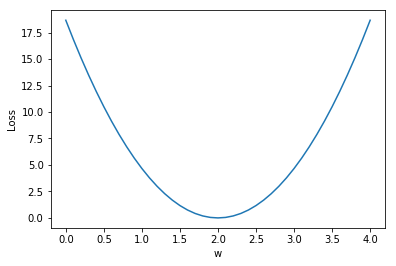

In [26]:
# Linear Model
# y_pred = x*w
# Loss = (y_pred-y)^2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#w= 1.0 # random guess. let's start with it.

#our model for forward guess
def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

#compute loss for all w
w_list = []
mse_list = []

#use w with starting from 0.0 to 4.1 with 0.1 steps
for w in np.arange(0.0, 4.1, 0.1):
    print("w= ", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val,y_val)
        l_sum += l
        print("\t", "x_val: ", x_val, "y_val: ", y_val, "y_pred_val: ", y_pred_val, l)
    #MSE: Mean Squared Error    
    print("MSE: ", l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)

plt.plot(w_list, mse_list)
plt.ylabel("Loss")
plt.xlabel("w")
plt.show()
    


In [31]:
# Learning or training is all about finding w that minimizes the loss!
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0
eta = 0.01

def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

#compute gradient
def gradient(x,y): # d_loss/d_w
    return 2 * x * (x * w - y)

# Training
for epoch in range(1000):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - eta * grad
        print("\tgrad: ", x_val, y_val, grad)
        l = loss(x_val, y_val)
    print("progress:", epoch, "w:", w, "loss:", l)


Predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress: 0 w: 1.260688 loss: 4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress: 1 w: 1.453417766656 loss: 2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress: 2 w: 1.5959051959019805 loss: 1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress: 3 w: 1.701247862192685 loss: 0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress: 4 w: 1.7791289594933983 loss: 0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress: 5 w: 1.836707389300983 loss: 0.2399802903801062
	grad:  1.0 2.0 -0.3265852213980338
	grad:  2

progress: 90 w: 1.9999999999988431 loss: 1.2047849775995315e-23
	grad:  1.0 2.0 -2.3137047833188262e-12
	grad:  2.0 4.0 -9.070078021977679e-12
	grad:  3.0 6.0 -1.8779644506139448e-11
progress: 91 w: 1.9999999999991447 loss: 6.5840863393251405e-24
	grad:  1.0 2.0 -1.7106316363424412e-12
	grad:  2.0 4.0 -6.7057470687359455e-12
	grad:  3.0 6.0 -1.3882228699912957e-11
progress: 92 w: 1.9999999999993676 loss: 3.5991747246272455e-24
	grad:  1.0 2.0 -1.2647660696529783e-12
	grad:  2.0 4.0 -4.957811938766099e-12
	grad:  3.0 6.0 -1.0263789818054647e-11
progress: 93 w: 1.9999999999995324 loss: 1.969312363793734e-24
	grad:  1.0 2.0 -9.352518759442319e-13
	grad:  2.0 4.0 -3.666400516522117e-12
	grad:  3.0 6.0 -7.58859641791787e-12
progress: 94 w: 1.9999999999996543 loss: 1.0761829795642296e-24
	grad:  1.0 2.0 -6.914468997365475e-13
	grad:  2.0 4.0 -2.7107205369247822e-12
	grad:  3.0 6.0 -5.611511255665391e-12
progress: 95 w: 1.9999999999997444 loss: 5.875191475205477e-25
	grad:  1.0 2.0 -5.1114668

	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 174 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 175 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 176 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 177 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 178 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
p

	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 261 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 262 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 263 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 264 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 265 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
p

progress: 348 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 349 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 350 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 351 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 352 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 353 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0

progress: 440 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 441 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 442 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 443 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 444 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 445 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0

	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 535 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 536 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 537 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 538 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 539 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
p

	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 618 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 619 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 620 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 621 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 622 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 623 w: 1.9999999999999993 loss

progress: 701 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 702 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 703 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 704 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 705 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 706 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0

progress: 812 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 813 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 814 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 815 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 816 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 817 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0

	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 924 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 925 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 926 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 927 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	grad:  3.0 6.0 -1.0658141036401503e-14
progress: 928 w: 1.9999999999999993 loss: 3.1554436208840472e-30
	grad:  1.0 2.0 -1.3322676295501878e-15
	grad:  2.0 4.0 -5.329070518200751e-15
	

In [2]:
# Backpropagation

"""
    Computational graph is a special form of neural network. It is a directed graph where the nodes correspond to operations
or variables. Variables can feed their value into operations, and operations can feed their output into other operations. 
This way, every node in the graph defines a function of the variables
    Computations of a neural network are organized in terms of a forward pass in which we compute the output of the neural network,
followed by a backward pass(propagation) which we use to compute gradients and derivatives.
Computational graph explains why it is organized this way.
    In Computational graph, we have a special output variable that we want to optimize. In logistic regression, this
output is cost(loss) function that we try to minimize.
    Tensor: Values that are fed into the nodes and come out of the nodes. It is some kind of multidimensional array.
"""
import torch
from torch.autograd import Variable

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = Variable(torch.Tensor([1.0]), requires_grad = True)

# Our model forward pass
def forward(x):
    return x * w

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

# Training
for epoch in range(10):
    for x_val, y_val in zip(x_data,y_data):
        l = loss(x_val, y_val)
        
        # This is all about "computational graph". this is why we call "l.backward()"
        # backward() function is doing backward operation and we then compute the gradients of every variable
        l.backward()
        print("\tgrad:", x_val, y_val, w.grad.data[0])
        #dLoss/dw will be stored in w.grad.data
        w.data = w.data - 0.01 * w.grad.data 
        
        # Manually zero the gradients after updating weights
        # We need to do this because once we do backward, autograd stores the sum of all gradients. But,
        #we only want gradient from the one we pass.
        w.grad.data.zero_()
    print("progress:", epoch, l.data[0])
        


	grad: 1.0 2.0 tensor(-2.)
	grad: 2.0 4.0 tensor(-7.8400)
	grad: 3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad: 1.0 2.0 tensor(-1.4786)
	grad: 2.0 4.0 tensor(-5.7962)
	grad: 3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad: 1.0 2.0 tensor(-1.0932)
	grad: 2.0 4.0 tensor(-4.2852)
	grad: 3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad: 1.0 2.0 tensor(-0.8082)
	grad: 2.0 4.0 tensor(-3.1681)
	grad: 3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad: 1.0 2.0 tensor(-0.5975)
	grad: 2.0 4.0 tensor(-2.3422)
	grad: 3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad: 1.0 2.0 tensor(-0.4417)
	grad: 2.0 4.0 tensor(-1.7316)
	grad: 3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad: 1.0 2.0 tensor(-0.3266)
	grad: 2.0 4.0 tensor(-1.2802)
	grad: 3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad: 1.0 2.0 tensor(-0.2414)
	grad: 2.0 4.0 tensor(-0.9465)
	grad: 3.0 6.0 tensor(-1.9592)
progress: 7 tensor(0.1066)
	grad: 1.0 2.0 tensor(-0.1785)
	grad: 2.0 

In [12]:
# Linear Regression with PyTorch

import torch
from torch.autograd import Variable

# Step 1: Create model
# Our dataset is 3*1 matrix.
x_data = Variable(torch.Tensor([[1.0],[2.0],[3.0]]))
y_data = Variable(torch.Tensor([[2.0],[4.0],[6.0]]))

# Our model class is a subclass of torch.nn.Module
class Model(torch.nn.Module):
    def __init__(self):
        """
        In the constructor, we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1) # This 1*1 matrix because we have one input(x), one output(y).
    
    def forward(self, x):
        """
        We get x as input and try to predict y_pred value. Here, we are not using x*w or something, but we are going to 
        use the block that we initilized in init.
        """
        y_pred = self.linear(x)
        return y_pred
    
# Our model:
model = Model()

# Step 2: Construct loss and optimizer.
"""
The call to model.parameters() in the SGD (Stochastic Gradient Descent) constructor will contain the learnable parameters 
of the two nn.Linear modules which are members of the model. 
"""
# Since this is linear regression, we use MSELoss
criterion = torch.nn.MSELoss(reduction='sum')
# lr: learning rate
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


# Step 3: Training: Forward, Loss, Backward, Step    
"""
This training is different because earlier, we update gradients one by one and update in a for loop. 
But now, we are using Stochastic Gradient Descent, and we compute variables at the same time, update the variable at once.
"""
for epoch in range(500):
    # Forward pass: compute y_pred by passing x_data to the model
    y_pred = model(x_data)
    
    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    
    # zero gradients, perform backward pass, update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
hour_var = Variable(torch.Tensor([[4.0]]))
print("predict (after training)", 4, model.forward(hour_var).item())

0 53.304229736328125
1 23.79090118408203
2 10.651524543762207
3 4.80137825012207
4 2.196201801300049
5 1.0356082916259766
6 0.5181120038032532
7 0.28691717982292175
8 0.18318702280521393
9 0.13621234893798828
10 0.11451493203639984
11 0.10408158600330353
12 0.09867377579212189
13 0.09551406651735306
14 0.09336625784635544
15 0.09167905151844025
16 0.09020792692899704
17 0.08884324878454208
18 0.08753585070371628
19 0.08626416325569153
20 0.08501843363046646
21 0.08379383385181427
22 0.08258846402168274
23 0.08140100538730621
24 0.0802309438586235
25 0.07907786965370178
26 0.07794132083654404
27 0.07682103663682938
28 0.07571689784526825
29 0.07462882250547409
30 0.07355627417564392
31 0.07249921560287476
32 0.07145736366510391
33 0.07043033093214035
34 0.06941822916269302
35 0.06842053681612015
36 0.06743721663951874
37 0.06646791845560074
38 0.06551271677017212
39 0.06457126885652542
40 0.06364325433969498
41 0.06272866576910019
42 0.06182705610990524
43 0.0609385222196579
44 0.060062